In [47]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [48]:
columns = ['target', 'ids', 'date', 'flags', 'user', 'text']
df = pd.read_csv('twitter.csv', encoding='latin-1', names=columns)
df

,target,ids,date,flags,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


Information über den Datasatz bekommen

In [49]:
df.info

<bound method DataFrame.info of          target         ids                          date     flags  \
0             0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1             0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2             0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3             0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4             0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1599995       4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996       4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997       4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998       4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999       4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                    user                                               text  
0        _TheSpecialOne_  @switchfoot

Prüfen wir, ob es fehlende Daten gibt

In [50]:
df.isnull().sum()

target    0
ids       0
date      0
flags     0
user      0
text      0
dtype: int64

Wir beschränken unsere Arbeit nur auf 2 Spalten: Target und Text

In [51]:
df = df[['target', 'text']]
df

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


Wir prüfen, welche  Werte in der Spalte Target vorkommen

In [52]:
df.target.unique()

array([0, 4], dtype=int64)

Durch die Analyse deS Datensatz haben wir herausgefunden, dass target 4 zu den positiven Tweet gehört. 
Wir ersetzen dann 4 durch 1

In [53]:
df.loc[df['target'] == 4, 'target'] = 1
df.target.unique()

array([0, 1], dtype=int64)

Wir gucken, welche Anteil von Tweet positiv bzw. negativ ist.
Und wir stellen es durch einen Balkendiagramm dar

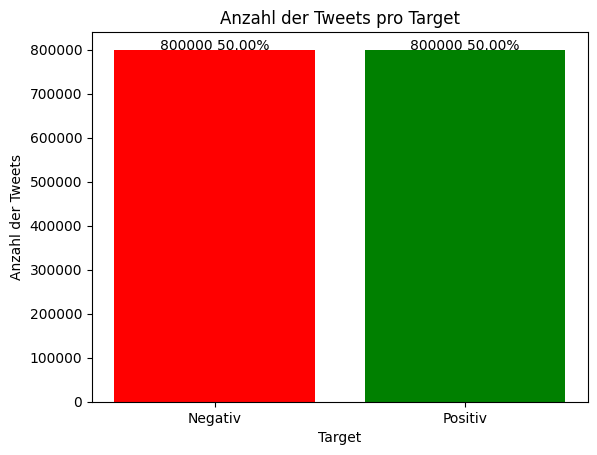

In [54]:
target_counts = df['target'].value_counts()

target_proportions = df['target'].value_counts(normalize=True)

plt.bar(target_counts.index, target_counts.values, color=['red', 'green'])

for i , count in enumerate(target_counts):
    proportion= target_proportions[i]
    plt.text(i, count + 50, f'{count} {proportion:.2%}', ha='center')
    
plt.xlabel('Target')
plt.ylabel('Anzahl der Tweets')
plt.title('Anzahl der Tweets pro Target')

plt.xticks(target_counts.index, ['Negativ', 'Positiv'])

plt.show()


Da wir insgesamt 1.600.000 Tweets haben, wollen wir uns jetzt nur auf 10.000 postive und 10.000 negative beschränken

In [55]:
positiv_tweet = df[df['target'] ==1].sample(n=10000, random_state=42)
negativ_tweet = df[df['target'] ==0].sample(n=10000, random_state=42)

df= pd.concat([positiv_tweet, negativ_tweet])

df = df.reset_index(drop=True)
df

,target,text
0,1,Is lookin 4ward to a long weekend really dont...
1,1,#myweakness Is music and i live to meet the p...
2,1,figured out the Internet on my new iPod
3,1,@hillsongunited can't wait to worship with you...
4,1,@sillybeggar Congrats James !! I'm sure the bo...
...,...,...
19995,0,really hates that they are totally messing up ...
19996,0,@BrownSuga3000 THANX FOR TELLING ME!!
19997,0,really sad that graduation is coming so fast.....
19998,0,Raining cats n dogs.


Funktion zum Generieren von WordCloud

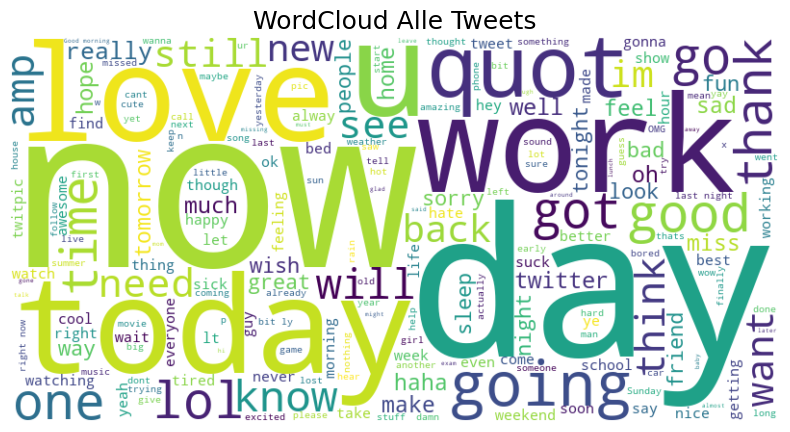

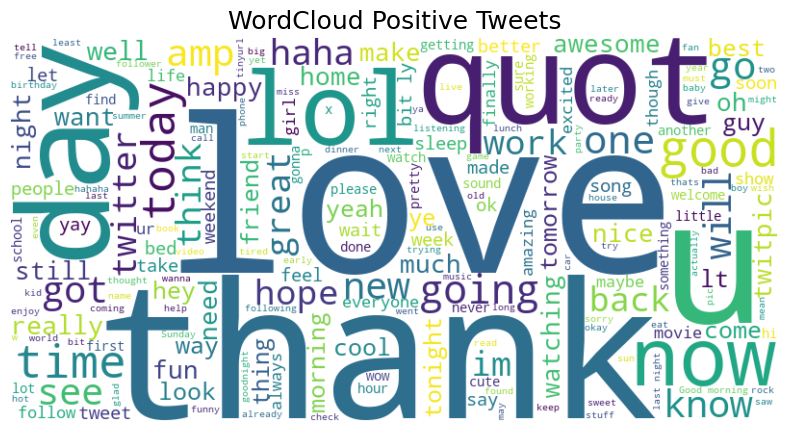

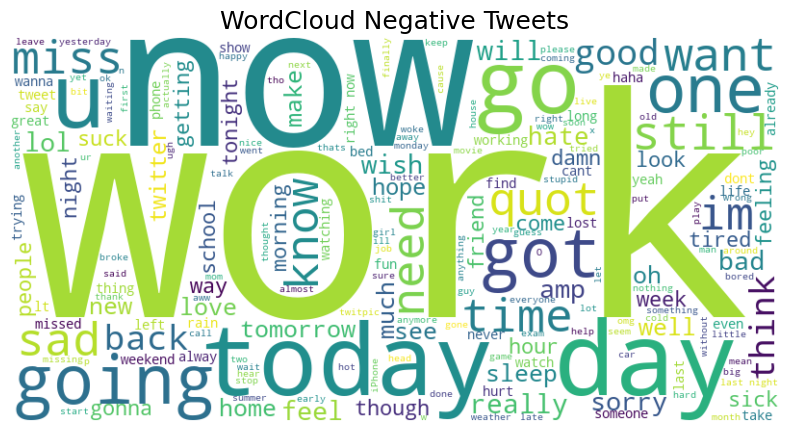

In [56]:
def generate_wordcloud(title, text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=18)
    plt.show()
    
    
# WordCloud für alle Tweets
generate_wordcloud("WordCloud Alle Tweets", " ".join(df['text']))

# WordCloud für positive Tweets
generate_wordcloud("WordCloud Positive Tweets", " ".join(df[df['target'] == 1]['text']))

# WordCloud für negative Tweets
generate_wordcloud("WordCloud Negative Tweets", " ".join(df[df['target'] == 0]['text']))



Bereinigung von Daten

In [57]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# NLTK-Resourcen laden
import nltk

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')


# Lemmatizer-Objekt erstellen
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    #  Alles in Kleinbuchstaben
    text = text.lower()

    #  Sonderzeichen und Zahlen entfernen
    text = re.sub(r'[^a-z\s]', '', text)

    #  Tokenisierung
    words = nltk.word_tokenize(text)

    #  Stopwords entfernen (Englisch)
    words = [word for word in words if word not in stopwords.words('english')]

    #  Lemmatisierung
    words = [lemmatizer.lemmatize(word) for word in words]

    #  Zurück in einen String
    cleaned_text = " ".join(words)

    return cleaned_text

df['text_clean'] = df['text'].apply(clean_text)


[nltk_data] Downloading package wordnet to C:\Users\Lenovo
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Lenovo
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Lenovo
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [59]:
df

,target,text,text_clean
0,1,Is lookin 4ward to a long weekend really dont...,lookin ward long weekend really dont want go w...
1,1,#myweakness Is music and i live to meet the p...,myweakness music live meet people make
2,1,figured out the Internet on my new iPod,figured internet new ipod
3,1,@hillsongunited can't wait to worship with you...,hillsongunited cant wait worship guy tonight i...
4,1,@sillybeggar Congrats James !! I'm sure the bo...,sillybeggar congrats james im sure book going ...
...,...,...,...
19995,0,really hates that they are totally messing up ...,really hate totally messing new moon favorite ...
19996,0,@BrownSuga3000 THANX FOR TELLING ME!!,brownsuga thanx telling
19997,0,really sad that graduation is coming so fast.....,really sad graduation coming fastand im losing...
19998,0,Raining cats n dogs.,raining cat n dog


Wordcloud auf den bereinigten Datensatz

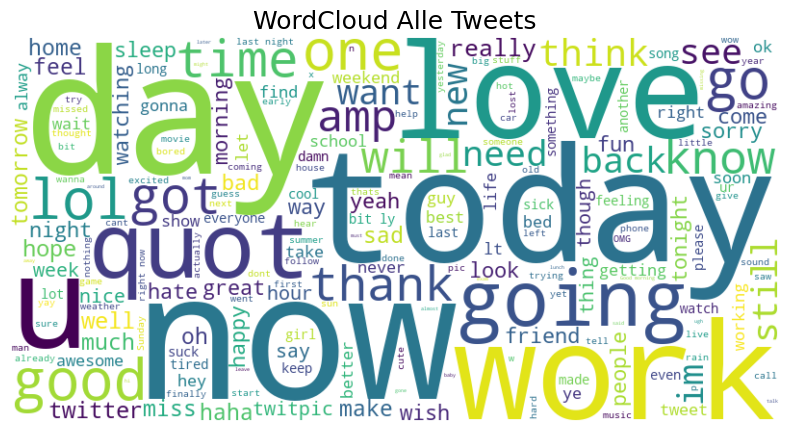

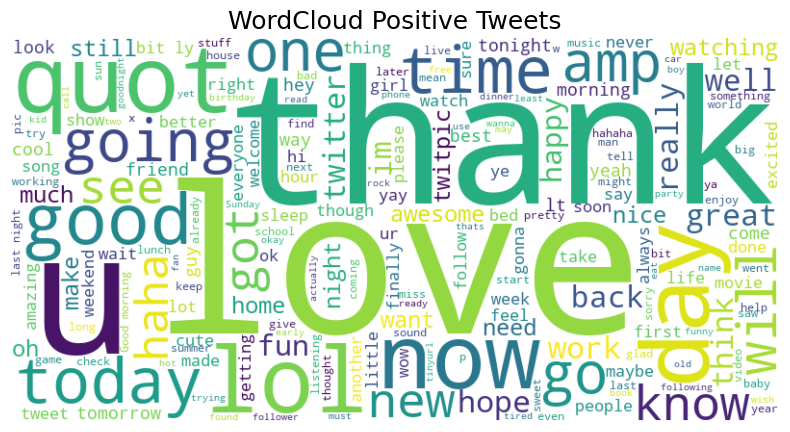

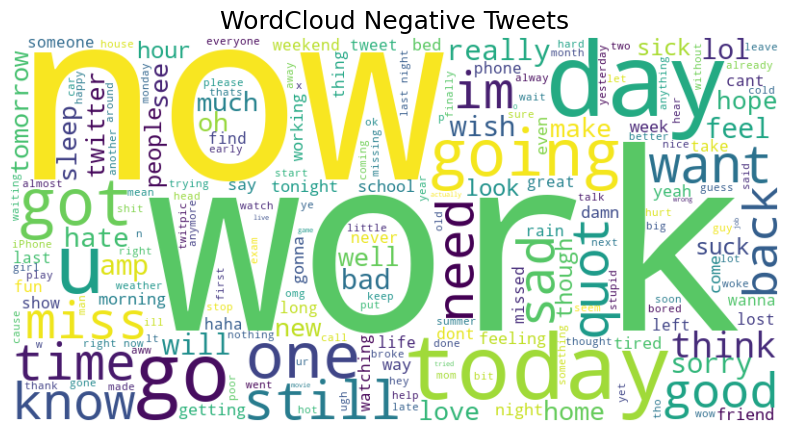

In [60]:
# WordCloud für alle Tweets
generate_wordcloud("WordCloud Alle Tweets", " ".join(df['text']))

# WordCloud für positive Tweets
generate_wordcloud("WordCloud Positive Tweets", " ".join(df[df['target'] == 1]['text']))

# WordCloud für negative Tweets
generate_wordcloud("WordCloud Negative Tweets", " ".join(df[df['target'] == 0]['text']))



Pipeline TF-IDF (Term Frequency-Inverse Document Frequency) + LinearSVC ( Support Vector Machines )

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

print(df['target'].value_counts())

X_train, X_test, y_train, y_test = train_test_split(df['text_clean'], df['target'], test_size=0.2, random_state=42, stratify=df['target'])

# Pipeline TF-IDF + LinearSVC
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(
        ngram_range=(1, 2),
        max_df=0.95,
        min_df=2,
        token_pattern=r'(?u)\b[a-z]+\b'
    )),
    ('clf', LinearSVC(class_weight='balanced', random_state=42))
])

#Training
pipe.fit(X_train, y_train)

# Evaluation
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))




target
1    10000
0    10000
Name: count, dtype: int64
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      2000
           1       0.72      0.73      0.73      2000

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000



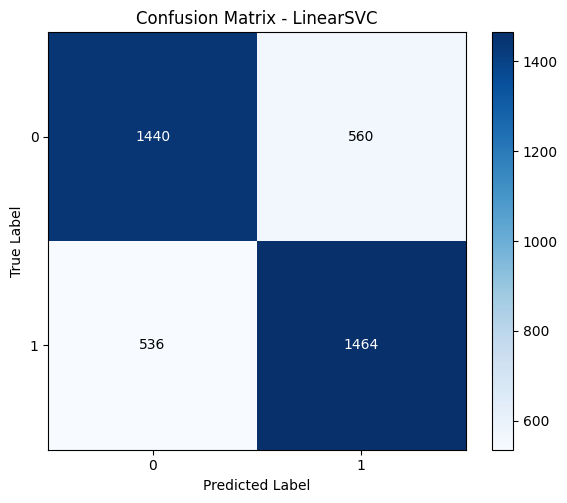

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion-Matrix berechnen
labels = np.sort(np.unique(np.concatenate([y_test, y_pred])))
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot erstellen
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)  # Farbskala
plt.colorbar(im, ax=ax)  # Farbskala daneben

# Achsenbeschriftung
ax.set_title('Confusion Matrix - LinearSVC')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Zahlen in jede Zelle schreiben
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, f"{cm[i, j]:d}",
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()
